# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

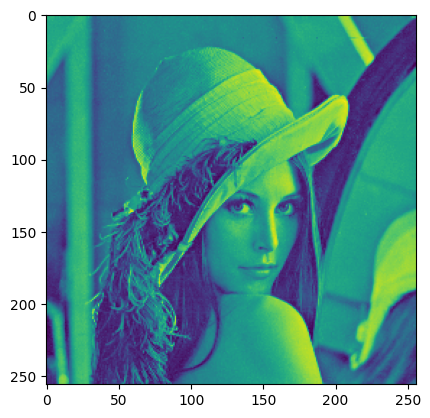

In [2]:
import numpy
import matplotlib.pyplot as plt
Lena = plt.imread("data/lena.png")
plt.imshow(Lena)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [3]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        count = 0
        for q in numpy.ndindex(size, size):
            x = p[0]-n+q[0]
            y = p[1]-n+q[1]
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]:
                count += 1
                neighborhood_sum += img[x,y]
        if count == size**2:
            result[p] = neighborhood_sum/size**2
        else: result[p] = 0
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

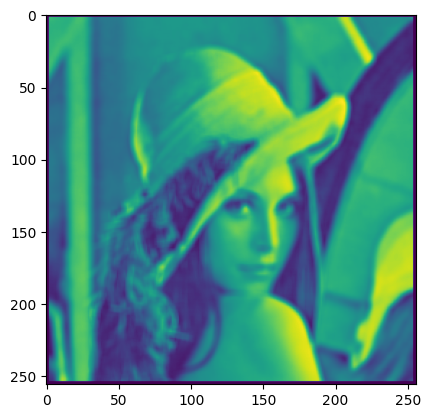

In [4]:
plt.imshow(meanfilter(Lena,5))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [5]:
#plt.imshow(plt.imread("data/lena_meanfilter5.png"))
assert numpy.allclose(meanfilter(Lena,5), plt.imread("data/lena_meanfilter5.png"), atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [6]:
def medianfilter(img, size):
    n = (size - 1) // 2
    result = numpy.zeros(img.shape)
    for p in numpy.ndindex(img.shape):
        liste = []
        count = 0
        for q in numpy.ndindex(size,size):
            x = p[0]-n+q[0]
            y = p[1]-n+q[1]
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]:
                count+=1
                liste.append(img[x,y])
        if count == size ** 2:
            result[p] = sorted(liste)[(size**2 - 1) // 2]
        else:
            result[p] = 0
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

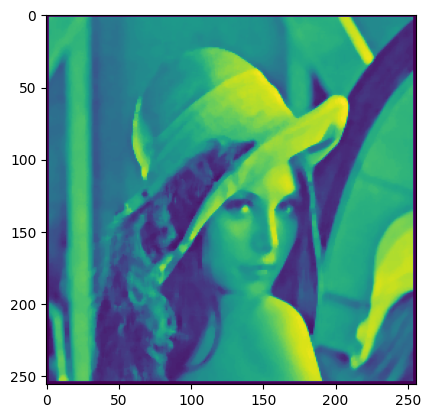

In [7]:
plt.imshow(medianfilter(Lena,5))

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [8]:
assert numpy.allclose(medianfilter(Lena,5), plt.imread("data/lena_medianfilter5.png"), atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [9]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

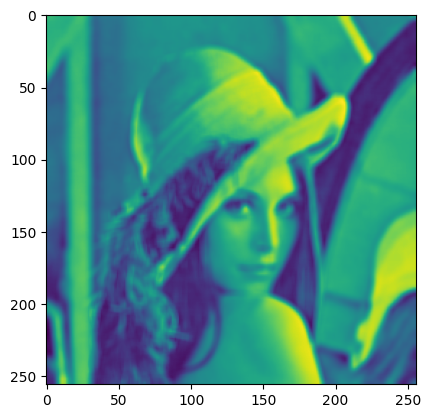

In [10]:
unif=scipy.ndimage.uniform_filter(Lena,5)
plt.imshow(unif)

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

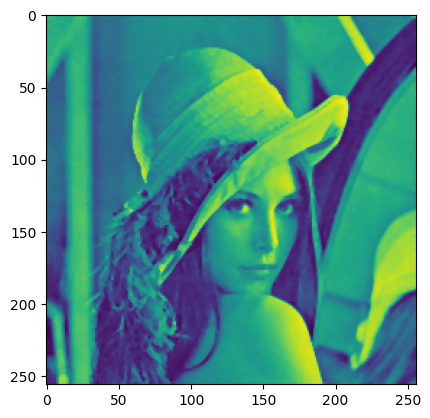

In [11]:
med=scipy.ndimage.median_filter(Lena,3)
plt.imshow(med)

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

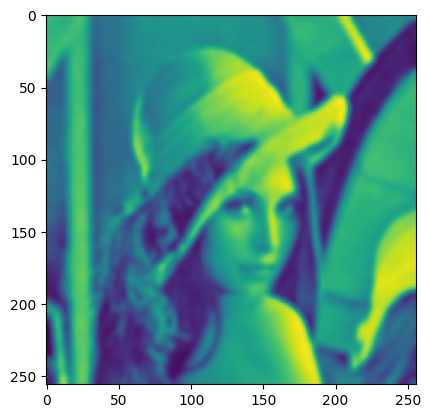

In [12]:
gau=scipy.ndimage.gaussian_filter(Lena,2)
plt.imshow(gau)

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

Weniger Rand bei den implementierten, es wird nicht abgeschnitten, falls der Rahmen außerhalb des Bildes liegt.

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [21]:
def fastfilter(img, size):
    result=numpy.zeros(img.shape)
    n=(size-1)//2
    for p in numpy.ndindex(img.shape):
        r0 = p[0] - n
        r1 = p[0] + n+1
        c0 = p[1] - n
        c1 = p[1] + n+1
        mask = img[r0:r1,c0:c1]
        if 0<r0 and r1 < img.shape[0] and 0 < c0 and c1 < img.shape[1]:
            result[p]=mask.mean()
        else:
            result[p] = 0
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

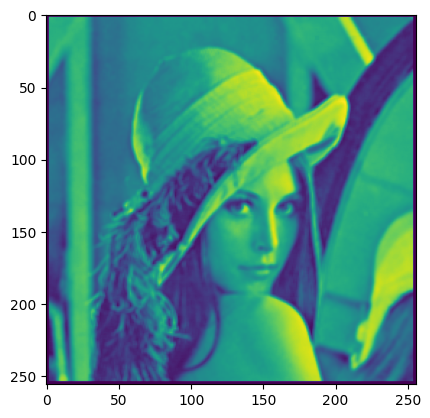

In [22]:
plt.imshow(fastfilter(Lena,3))

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

TypeError: allclose() missing 1 required positional argument: 'b'

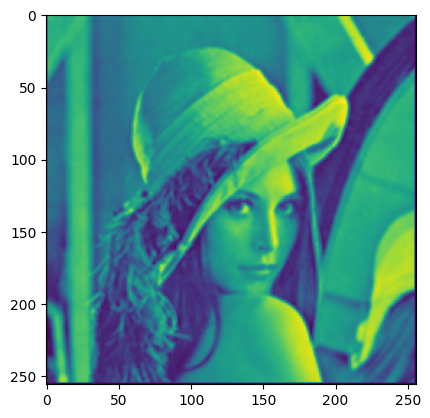

In [17]:
plt.imshow(meanfilter(Lena,3))
assert numpy.allclose(meanfilter(Lena,5), numpy.allclose(fastfilter(Lena,5)), atol=1/255)

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [19]:
%timeit fastfilter(img, 9)


NameError: name 'img' is not defined

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: